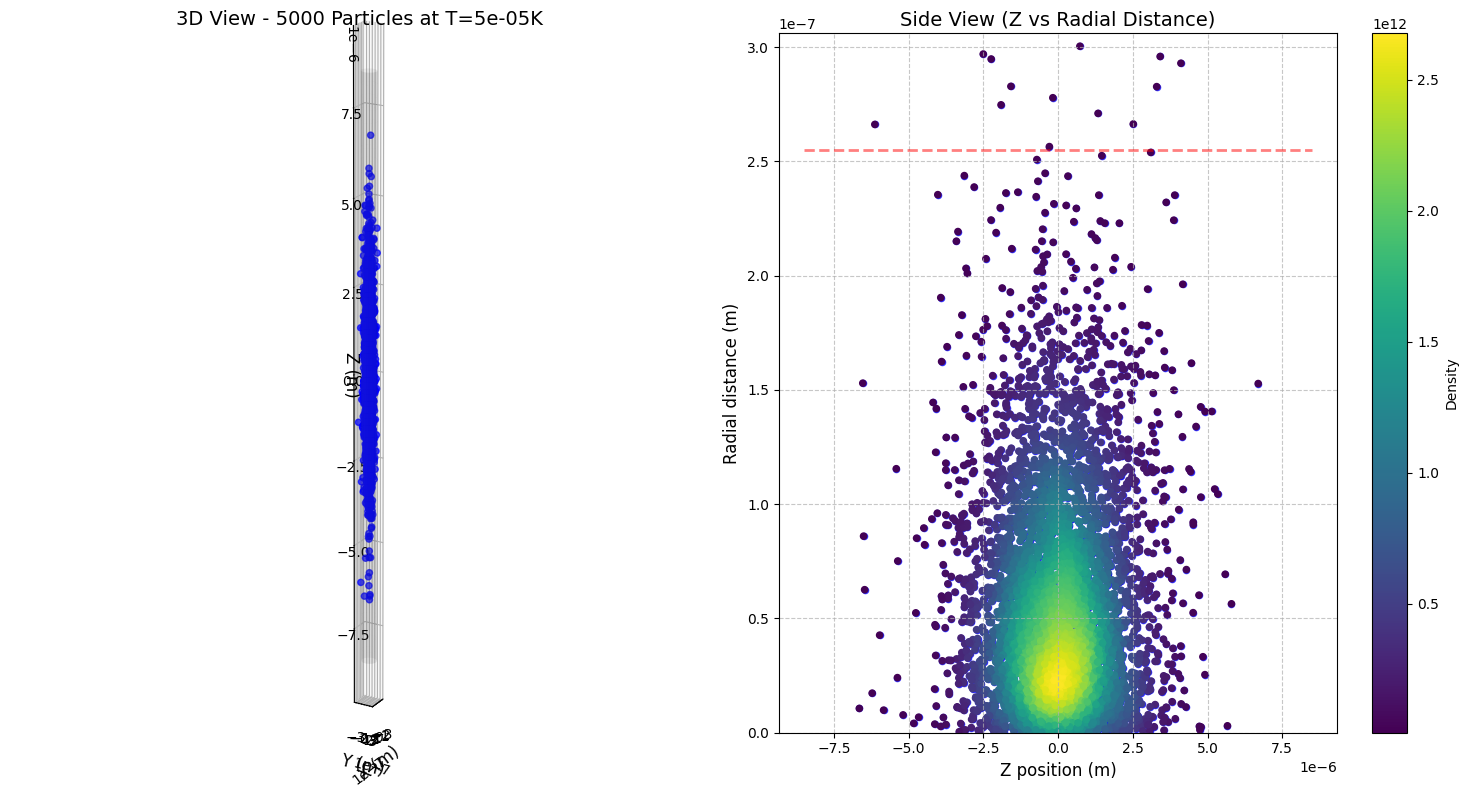

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.constants import Boltzmann

# Define parameters
lambda_0 = 780e-9  # wavelength in meters

N = 5000  # number of atoms
T = 50e-6  # temperature is 50 uk
kb = Boltzmann
# Function to generate thermal distribution in a cylinder
def generate_thermal_distribution_in_cylinder(num_particles,lambda_0,T):
    positions = np.zeros((N, 3))
    
    # For a dipole trap, the potential is typically:
    # U(r,z) = U_0 * (1 - exp(-2r²/w_r²) * exp(-2z²/w_z²))
    # where w_r is the radial waist and w_z is the axial waist
    radius = 0.5 * lambda_0  # cylinder radius
    length = 20 * lambda_0  # cylinder length
    # Using the waists as the radius and length/2
    w_r = radius
    w_z = length/2
    
    # Temperature parameter (arbitrary units, can be adjusted)
    kB_T = 0.1  # in units of U_0
    
    for i in range(N):
        # Implement rejection sampling for thermal distribution
        while True:
            # Generate uniform random positions within cylinder bounds
            r_candidate = radius * np.random.random()
            z_candidate = length * (np.random.random() - 0.5)
            
            # Calculate potential energy at this position (normalized)
            U = (1 - np.exp(-2 * (r_candidate/w_r)**2) * np.exp(-2 * (z_candidate/w_z)**2))
            
            # Calculate Boltzmann factor: exp(-U/kB_T)
            boltzmann_factor = np.exp(-U/kB_T)
            
            # Accept with probability proportional to Boltzmann factor
            if np.random.random() < boltzmann_factor:
                # Random angle for cylindrical symmetry
                theta = 2 * np.pi * np.random.random()
                
                # Convert to Cartesian coordinates
                x = r_candidate * np.cos(theta)
                y = r_candidate * np.sin(theta)
                z = z_candidate
                
                positions[i] = [x, y, z]
                break
    return positions

# Generate the positions
lambda_0 = 850e-9
radius = 0.3*lambda_0
length = 20*lambda_0
positions = generate_thermal_distribution_in_cylinder(N, lambda_0, T)
# Plot the positions in 3D

# Create a figure with two subplots: one for 3D view and one for 2D projection
fig = plt.figure(figsize=(15, 8))

# 3D plot (elongated view)
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(positions[:, 0], positions[:, 1], positions[:, 2], c='blue', marker='o', alpha=0.7)
ax1.set_xlabel('X (m)', fontsize=12)
ax1.set_ylabel('Y (m)', fontsize=12)
ax1.set_zlabel('Z (m)', fontsize=12)
ax1.set_title(f'3D View - {N} Particles at T={T}K', fontsize=14)

# Create cylinder wireframe for 3D plot
theta = np.linspace(0, 2*np.pi, 50)
z = np.linspace(-length/2, length/2, 50)
theta_grid, z_grid = np.meshgrid(theta, z)
x_grid = radius * np.cos(theta_grid)
y_grid = radius * np.sin(theta_grid)
ax1.plot_surface(x_grid, y_grid, z_grid, alpha=0.1, color='gray')

# Adjust 3D view to better show the elongated structure
ax1.view_init(elev=20, azim=30)
# Don't force equal aspect ratio to better visualize the elongated structure
ax1.set_box_aspect([radius*2, radius*2, length])

# 2D projection plot (side view)
ax2 = fig.add_subplot(122)
ax2.scatter(positions[:, 2], np.sqrt(positions[:, 0]**2 + positions[:, 1]**2), c='blue', alpha=0.7, s=20)
ax2.set_xlabel('Z position (m)', fontsize=12)
ax2.set_ylabel('Radial distance (m)', fontsize=12)
ax2.set_title('Side View (Z vs Radial Distance)', fontsize=14)

# Add cylinder boundaries to 2D plot
ax2.plot([-length/2, length/2], [radius, radius], 'r--', alpha=0.5, linewidth=2)
ax2.set_xlim(-length/2*1.1, length/2*1.1)
ax2.set_ylim(0, radius*1.2)
ax2.grid(True, linestyle='--', alpha=0.7)

# Add colorbar for density visualization in 2D plot
from scipy.stats import gaussian_kde
xy = np.vstack([positions[:, 2], np.sqrt(positions[:, 0]**2 + positions[:, 1]**2)])
z = gaussian_kde(xy)(xy)
sc = ax2.scatter(positions[:, 2], np.sqrt(positions[:, 0]**2 + positions[:, 1]**2), c=z, s=20, cmap='viridis')
plt.colorbar(sc, ax=ax2, label='Density')

plt.tight_layout()
plt.show()




In [7]:
Boltzmann 

1.380649e-23